In [1]:
%matplotlib inline
#data manipulation
import numpy as np
import pandas as pd
#python imports
import math,time,random,datetime
#data visualisation
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
#preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
#machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection,tree,preprocessing,metrics
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
gender_submission=pd.read_csv('gender_submission.csv')

In [3]:
train.head()  #training data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()  #test data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
gender_submission.head() #submission data on kaggle

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
len(train)

891

In [7]:
len(test)

418

In [8]:
train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


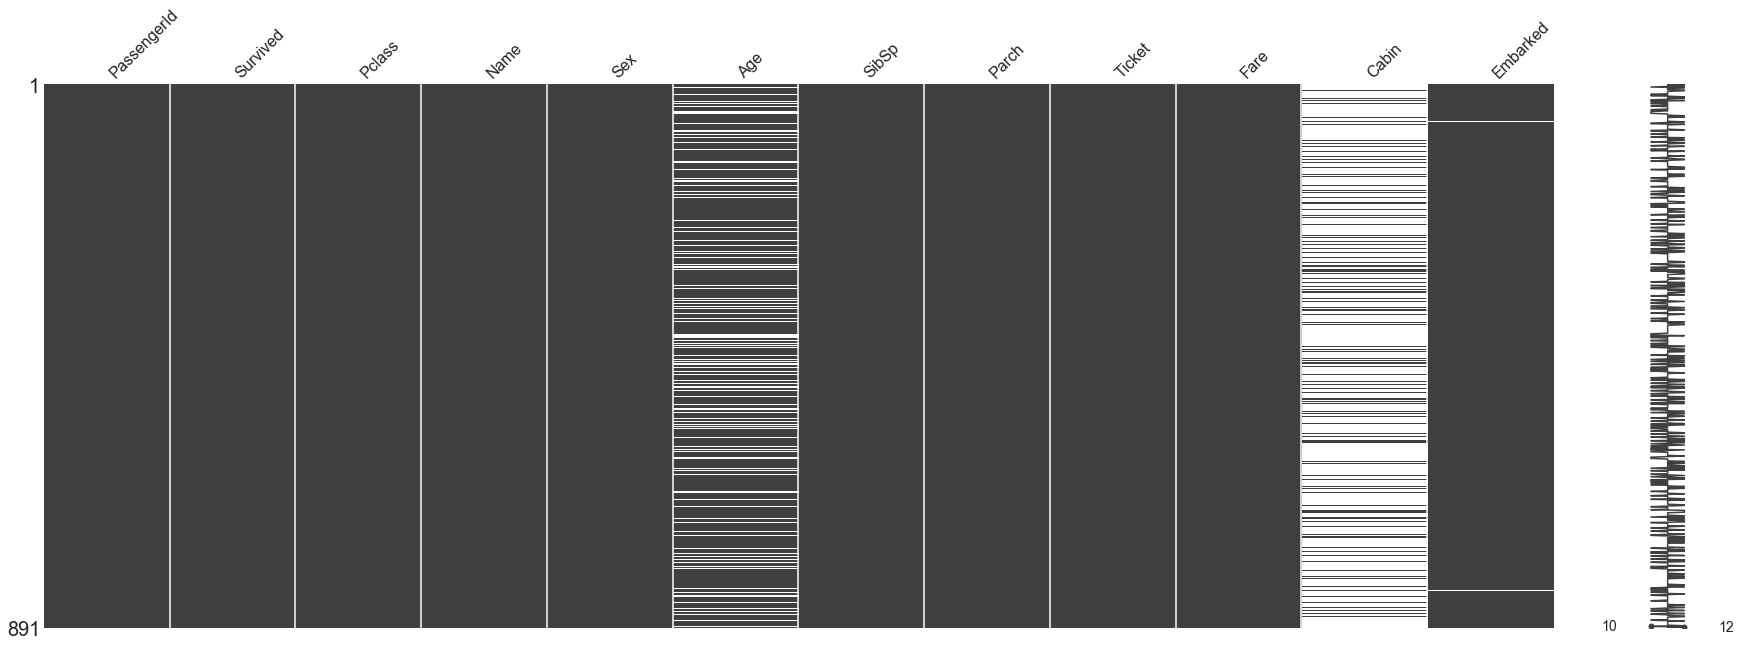

In [9]:
#checking where the missing values exist in train data
missingno.matrix(train, figsize=(30,10))

In [10]:
#from the above graph we see that missing values exist in max in cabin and age two values in embarked
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
def find_missing_values(df, columns):
    missing_val={}
    df_length=len(train)
    for column in columns:
        total_column_values=df[column].value_counts().sum()
        missing_val[column]=df_length-total_column_values
    return missing_val
missing_values=find_missing_values(train,train.columns)
missing_values

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

In [12]:
df_bin=pd.DataFrame()
df_con=pd.DataFrame()

In [13]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


0    549
1    342
Name: Survived, dtype: int64


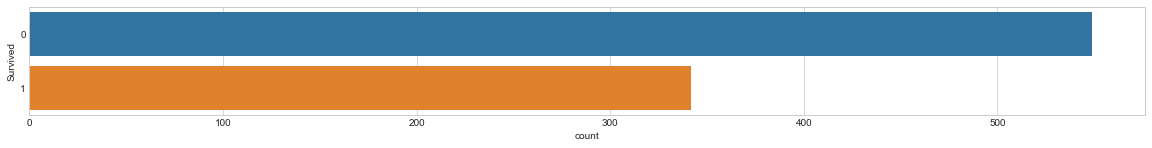

In [15]:
#visualizing each dtype
fig=plt.figure(figsize=(20,2))
sns.countplot(y='Survived',data=train);
print(train.Survived.value_counts())

In [16]:
df_bin['Survived']=train['Survived']
df_con['Survived']=train['Survived']

In [17]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [18]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


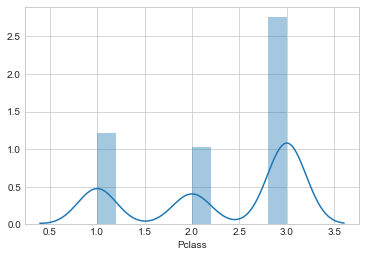

In [19]:
sns.distplot(train.Pclass)

In [20]:
missing_values['Pclass'] #dictionary containing ounts of missing values for each column

0

In [21]:
df_bin['Pclass']=train['Pclass']
df_con['Pclass']=train['Pclass']

In [22]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


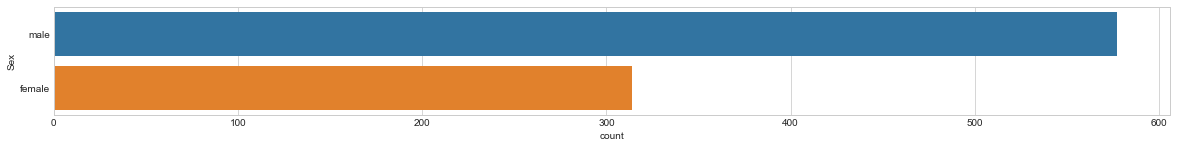

In [23]:
plt.figure(figsize=(20,2))
sns.countplot(y='Sex',data=train)

In [24]:
missing_values['Sex']

0

In [25]:
df_bin['Sex']=train['Sex']
df_bin['Sex']=np.where(df_bin['Sex']=='female',1,0)
df_con['Sex']=train['Sex']
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


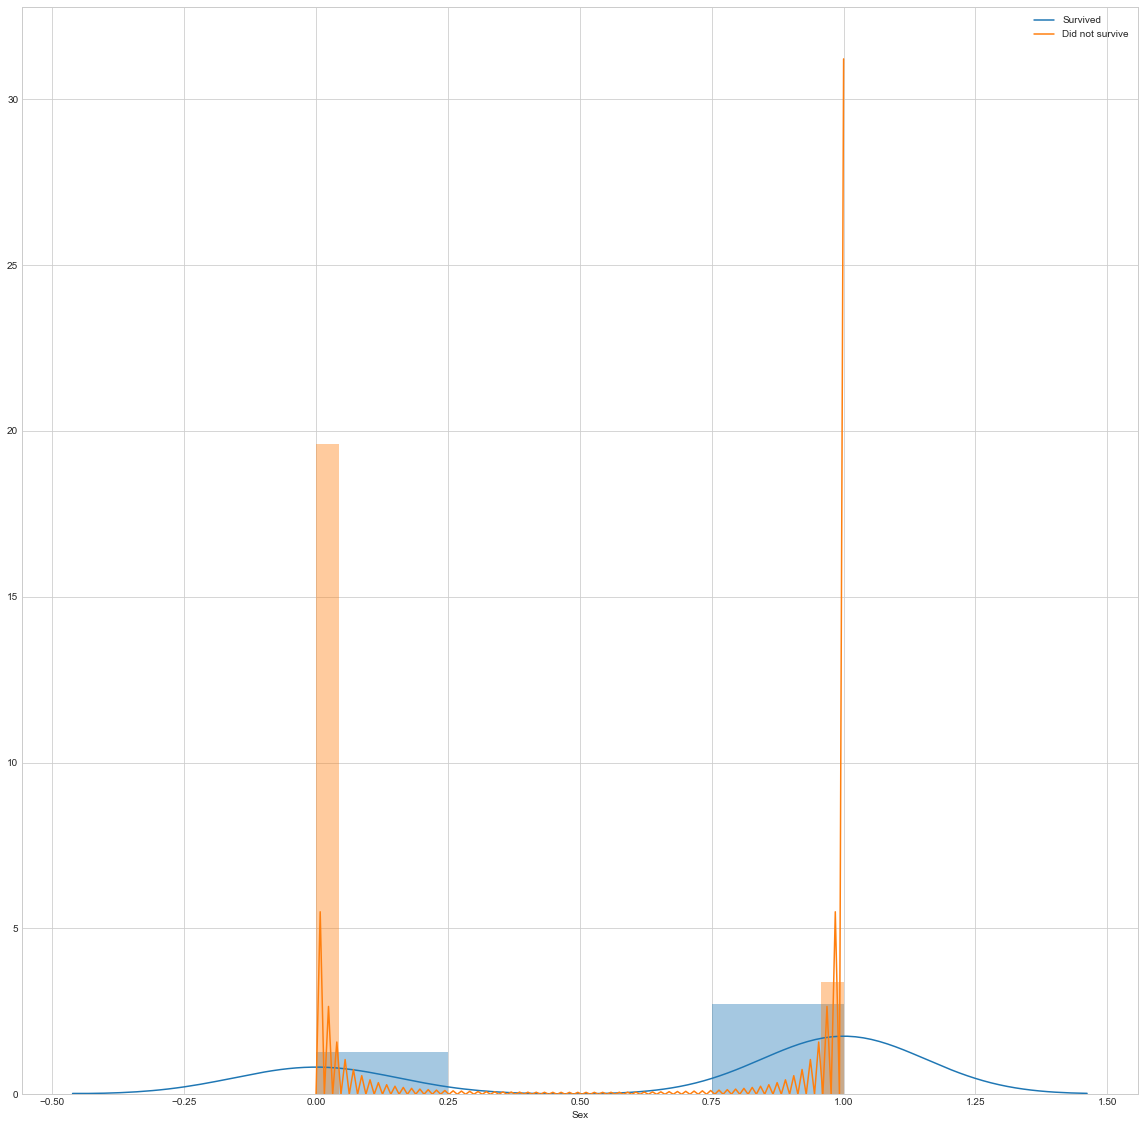

In [26]:
#comparison of Survived and Sex variable
fig = plt.figure(figsize=(20,20))
sns.distplot(df_bin.loc[df_bin['Survived']==1]['Sex'], kde_kws={'label':'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived']==0]['Sex'], kde_kws={'label':'Did not survive'});

In [27]:
missing_values['Age']

177

In [28]:
missing_values['SibSp']

0

In [29]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [30]:
df_bin['SibSp']=train['SibSp']
df_con['SibSp']=train['SibSp']
df_bin.head()

,Survived,Pclass,Sex,SibSp
0,0,3,0,1
1,1,1,1,1
2,1,3,1,0
3,1,1,1,1
4,0,3,0,0


In [31]:
def plot_count_dist(data,bin_df,label_column,target_column,figsize=(20,5),use_bin_df=False):
    if use_bin_df:
        fig=plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=target_column,data=bin_df)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_column],kde_kws={'label':'Survived'})
        sns.distplot(data.loc[data[label_column]==0][target_column],kde_kws={'label':'Did not Survive'})
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=target_column, data=data)
        plt.subplot(1,2,2)
        sns.distplot(data.loc[data[label_column]==1][target_column],kde_kws={'label':'Survived'})
        sns.distplot(data.loc[data[label_column]==0][target_column],kde_kws={'label':'Did not Survived'})

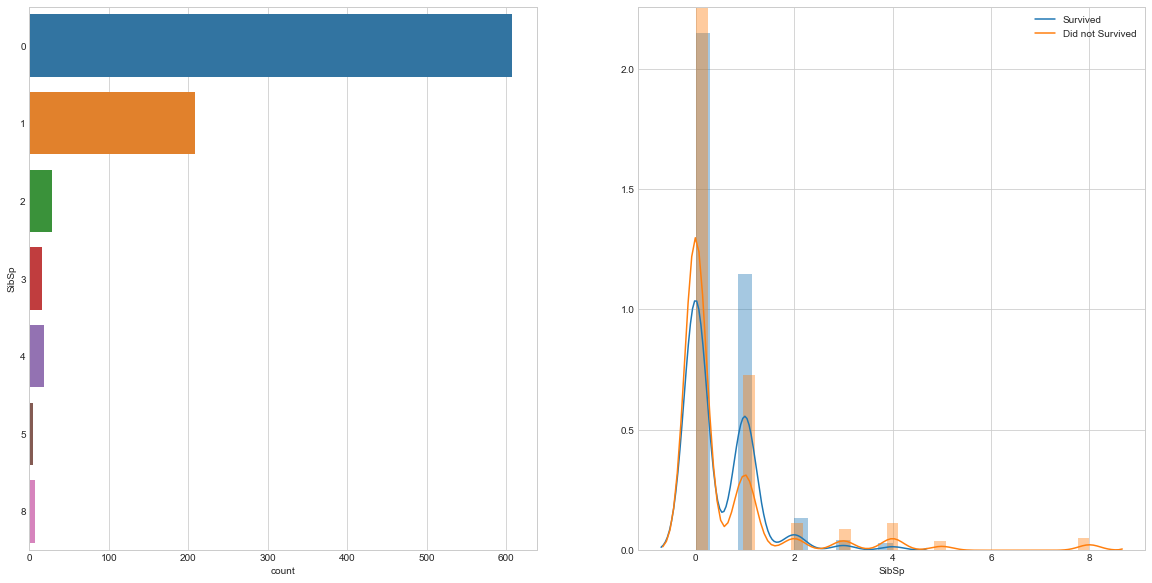

In [32]:
plot_count_dist(train,bin_df=df_bin,label_column='Survived',target_column='SibSp',figsize=(20,10))

In [33]:
missing_values['Parch']

0

In [34]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [35]:
df_bin['Parch']=train['Parch']
df_con['Parch']=train['Parch']

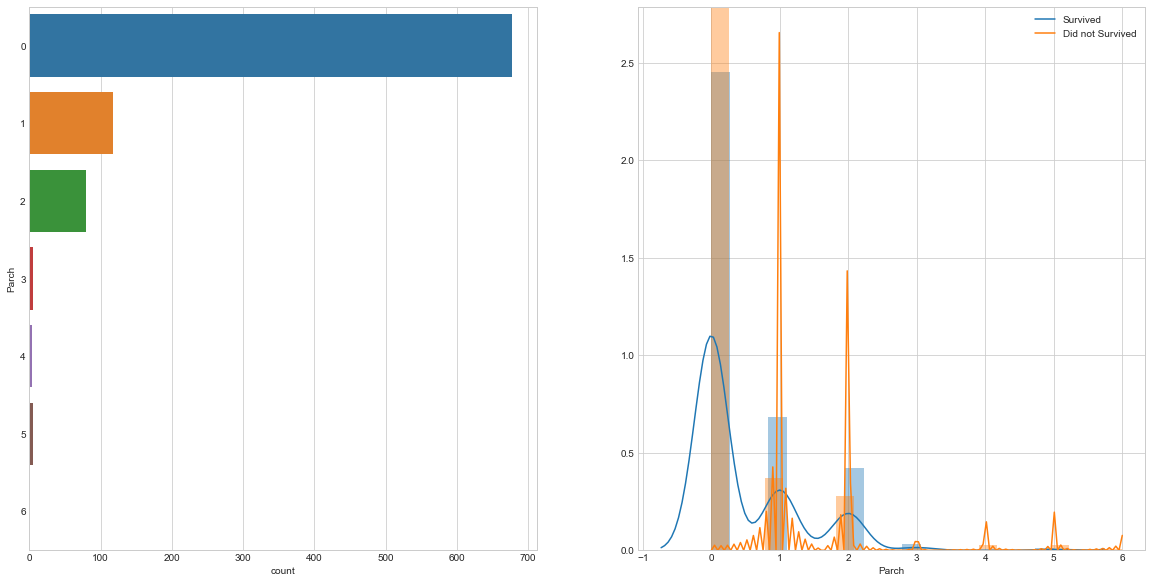

In [36]:
plot_count_dist(train,bin_df=df_bin,label_column='Survived',target_column='Parch',figsize=(20,10))

In [37]:
missing_values['Ticket']

0

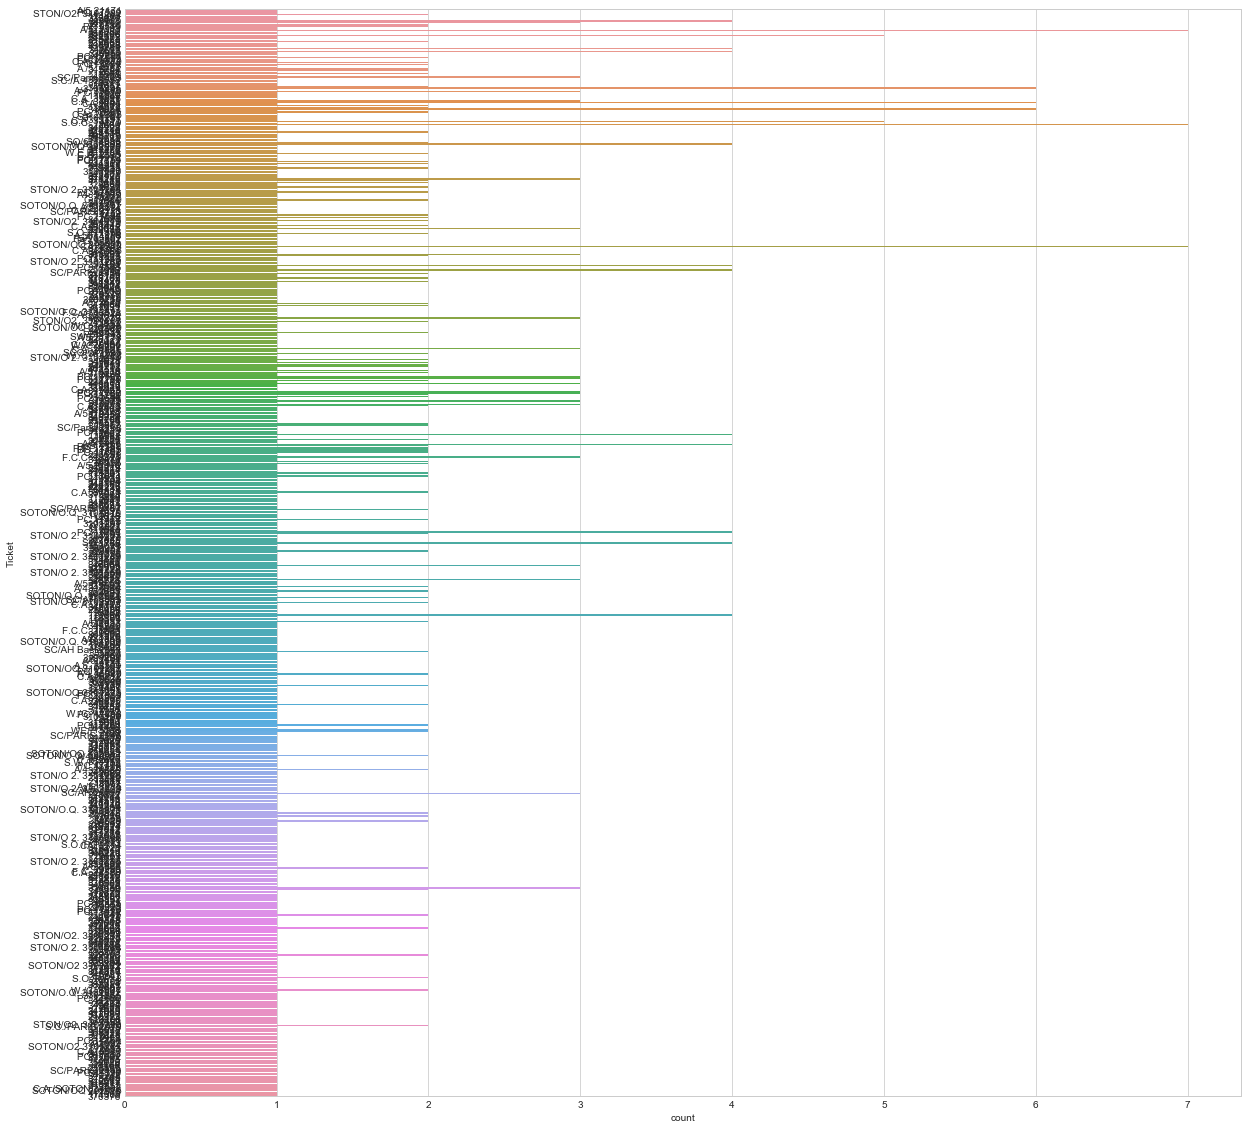

In [38]:
fig=plt.figure(figsize=(20,20))
sns.countplot(y="Ticket",data=train)

In [39]:
train.Ticket.value_counts()

347082               7
CA. 2343             7
1601                 7
347088               6
CA 2144              6
3101295              6
S.O.C. 14879         5
382652               5
19950                4
LINE                 4
349909               4
2666                 4
113781               4
347077               4
PC 17757             4
W./C. 6608           4
17421                4
4133                 4
113760               4
C.A. 31921           3
345773               3
110413               3
29106                3
C.A. 34651           3
248727               3
PC 17760             3
35273                3
PC 17755             3
13502                3
363291               3
                    ..
SC/PARIS 2167        1
330958               1
PC 17601             1
345778               1
315096               1
35851                1
364512               1
239856               1
2689                 1
SOTON/OQ 392076      1
364851               1
392091               1
370371     

In [40]:
missing_values['Fare']

0

In [41]:
train.Fare.value_counts()

8.0500      43
13.0000     42
7.8958      38
7.7500      34
26.0000     31
10.5000     24
7.9250      18
7.7750      16
26.5500     15
0.0000      15
7.2292      15
7.8542      13
8.6625      13
7.2500      13
7.2250      12
16.1000      9
9.5000       9
24.1500      8
15.5000      8
56.4958      7
52.0000      7
14.5000      7
14.4542      7
69.5500      7
7.0500       7
31.2750      7
46.9000      6
30.0000      6
7.7958       6
39.6875      6
            ..
7.1417       1
42.4000      1
211.5000     1
12.2750      1
61.1750      1
8.4333       1
51.4792      1
7.8875       1
8.6833       1
7.5208       1
34.6542      1
28.7125      1
25.5875      1
7.7292       1
12.2875      1
8.6542       1
8.7125       1
61.3792      1
6.9500       1
9.8417       1
8.3000       1
13.7917      1
9.4750       1
13.4167      1
26.3875      1
8.4583       1
9.8375       1
8.3625       1
14.1083      1
17.4000      1
Name: Fare, Length: 248, dtype: int64

In [42]:
train.Fare.dtype

dtype('float64')

In [43]:
df_con['Fare']=train['Fare']
df_bin['Fare']=pd.cut(train['Fare'],5)

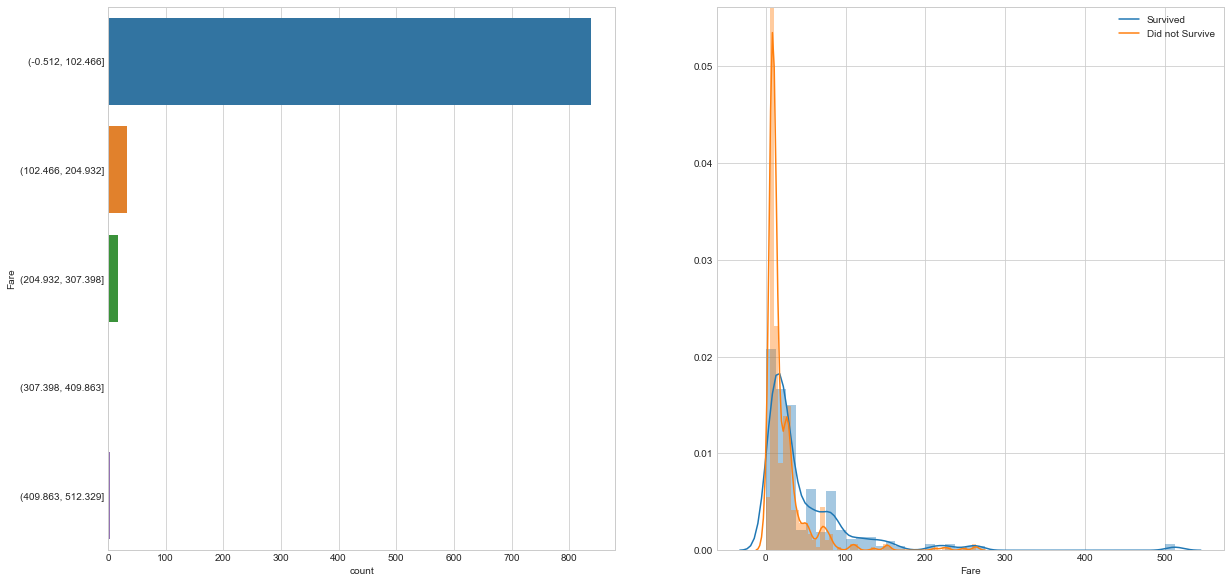

In [44]:
plot_count_dist(data=train, bin_df=df_bin,label_column='Survived',target_column='Fare',figsize=(20,10),use_bin_df=True)

In [45]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,"(-0.512, 102.466]"
1,1,1,1,1,0,"(-0.512, 102.466]"
2,1,3,1,0,0,"(-0.512, 102.466]"
3,1,1,1,1,0,"(-0.512, 102.466]"
4,0,3,0,0,0,"(-0.512, 102.466]"


In [46]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


In [47]:
missing_values['Cabin']

687

In [48]:
missing_values['Embarked']

2

In [49]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

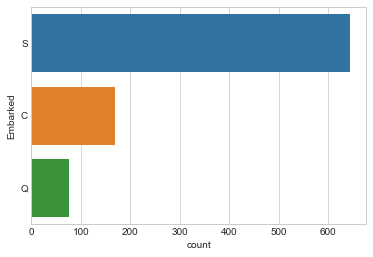

In [50]:
sns.countplot(y='Embarked',data=train)

In [51]:
df_bin['Embarked']=train['Embarked']
df_con['Embarked']=train['Embarked']

In [52]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [53]:
df_con=df_con.dropna(subset=['Embarked'])
df_bin=df_bin.dropna(subset=['Embarked'])

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [56]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [57]:
one_hot_cols=df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin,columns=one_hot_cols)
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [58]:
df_con_enc=df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


In [59]:
selected_df=df_con_enc

In [60]:
X_train=selected_df.drop('Survived',axis=1)
y_train=selected_df['Survived']

In [61]:
y_train.shape

(889,)

In [62]:
X_train.shape

(889, 6)

In [63]:
clf=GradientBoostingClassifier()
clf.fit(X_train,y_train)
acc_gbt = round(clf.score(X_train,y_train)*100,2)
train_pred=model_selection.cross_val_predict(clf,X_train,y_train,cv=10,n_jobs=-1)
acc_cv_gbt=round(metrics.accuracy_score(y_train,train_pred)*100,2)
print("Accuracy: %s" % acc_gbt) 
print("Accuracy CV 10-fold: %s" % acc_cv_gbt)

Accuracy: 86.39
Accuracy CV 10-fold: 81.1


In [64]:
def feature_importance(model,data):
    fea_imp=pd.DataFrame({'imp':model.feature_importances_, 'col':data.columns})
    fea_imp=fea_imp.sort_values(['imp','col'],ascending=[True,False]).iloc[-30:]
    _=fea_imp.plot(kind='barh',x='col',y='imp',figsize=(20,10))
    return fea_imp

,imp,col
5,0.031111,Embarked
0,0.046177,Pclass
2,0.046940,SibSp
3,0.085534,Parch
1,0.163012,Sex
4,0.627226,Fare


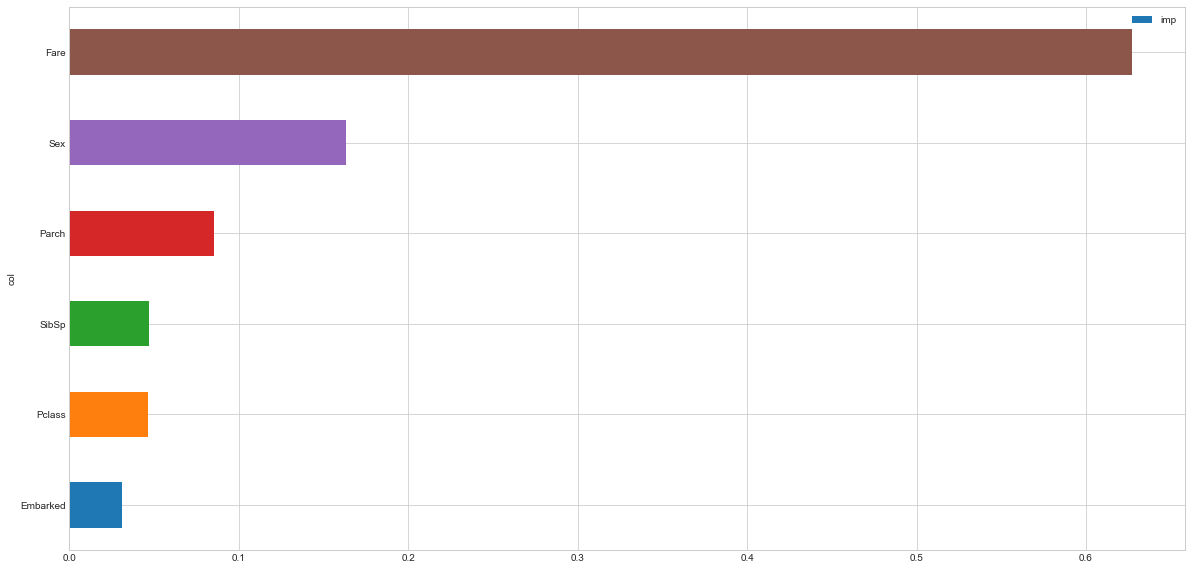

In [65]:
feature_importance(clf,X_train)

In [71]:
wanted_test_columns=df_con.drop('Survived',axis=1).columns
wanted_test_columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [91]:
predictions=clf.predict(test[wanted_test_columns].apply(LabelEncoder().fit_transform))

In [73]:
predictions[:20]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
      dtype=int64)

In [92]:
submission=pd.DataFrame()
submission['PassengerId']=test['PassengerId']
submission['Survived']=predictions
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [107]:
if(len(submission)==len(test)):
    print("YES they are same")
else:
    print("NO they are not")

YES they are same


In [108]:
submission.to_csv('Desktop/titanic/submission.csv',index=False)
print("submission is ready")

submission is ready


In [109]:
submission_check=pd.read_csv('Desktop/titanic/submission.csv')


In [110]:
submission_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
